In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(f'{column} has {df[column].isna().sum()} missing values')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [6]:
for column in df.columns :
    if df[column].dtype == 'object':
        print(f'{column} has {df[column].nunique()} unique values')

In [7]:
#doing min max scaling and standard scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler2 = StandardScaler()



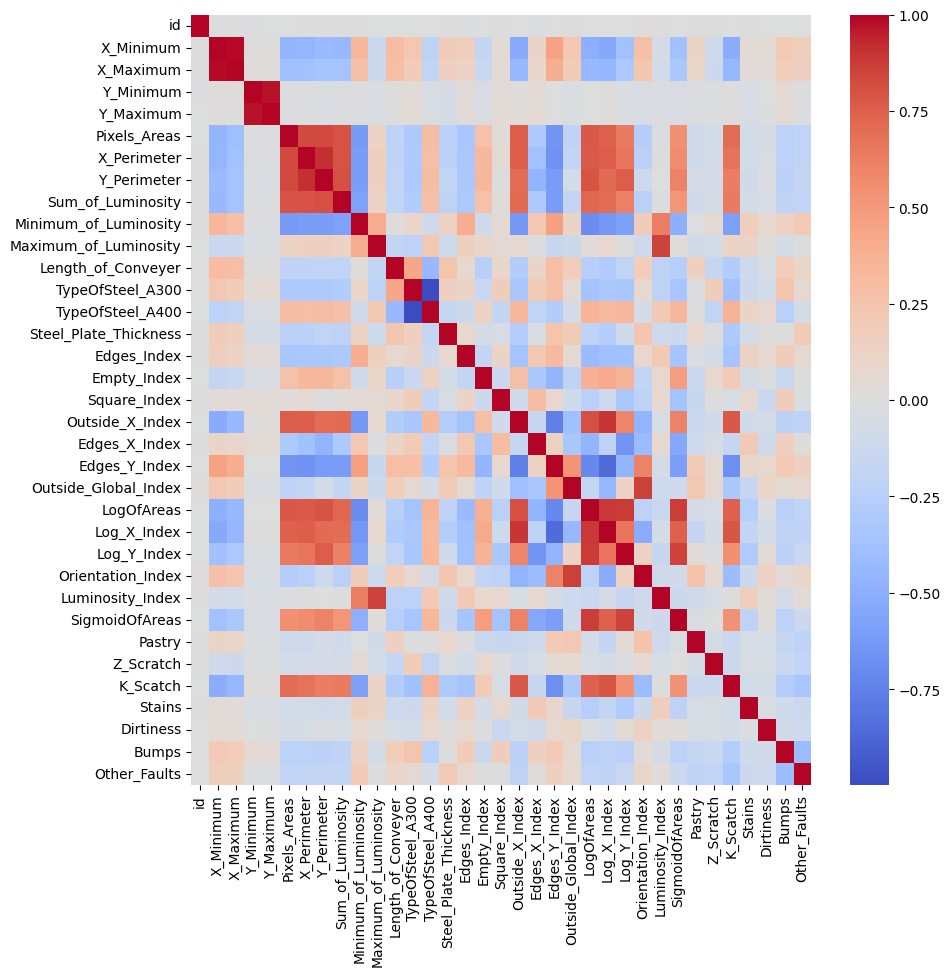

In [8]:
#make a correlation matrix 
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,  cmap='coolwarm')
plt.show()

In [9]:
test = pd.read_csv('test.csv')

In [10]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults

In [11]:
target_columns = ['Pastry' , 'Z_Scratch' , 'K_Scatch' , 'Stains' , 'Dirtiness' , 'Bumps' , 'Other_Faults']

In [12]:
df['Z_Scratch'].value_counts()

Z_Scratch
0    18069
1     1150
Name: count, dtype: int64

In [13]:
df['Pastry'].value_counts()

Pastry
0    17753
1     1466
Name: count, dtype: int64

In [14]:
#print top 10 columns correlated to pastry 
df.corr()['Pastry'].sort_values(ascending=False)[1:11]
pastry_top = df.corr()['Pastry'].sort_values(ascending=False)[0:11].index

In [15]:
df_Pastry = df[pastry_top]


In [16]:
test_Pastry = test[pastry_top[1:]]


In [17]:
df_Pastry.head()

,Pastry,Orientation_Index,Outside_Global_Index,Edges_Y_Index,Length_of_Conveyer,X_Minimum,X_Maximum,Steel_Plate_Thickness,Log_Y_Index,TypeOfSteel_A400,id
0,0,-0.5000,0.0,1.0000,1358,584,590,50,0.6990,1,0
1,0,0.7419,1.0,1.0000,1687,808,816,80,1.7324,0,1
2,0,-0.0105,0.0,0.3857,1400,39,192,40,2.2095,1,2
3,0,0.6667,1.0,0.9310,1387,781,789,40,1.4314,1,3
4,0,0.9158,1.0,0.9861,1692,1540,1560,300,1.8808,1,4


In [18]:
test_Pastry.head()

,Orientation_Index,Outside_Global_Index,Edges_Y_Index,Length_of_Conveyer,X_Minimum,X_Maximum,Steel_Plate_Thickness,Log_Y_Index,TypeOfSteel_A400,id
0,0.6727,1.0,1.0000,1656,1015,1033,150,1.6628,1,19219
1,0.9063,1.0,1.0000,1354,1257,1271,40,1.4472,1,19220
2,-0.5238,0.0,0.7500,1360,1358,1372,40,1.3222,1,19221
3,0.1818,1.0,1.0000,1690,158,168,100,1.0414,0,19222
4,-0.5714,0.0,0.5333,1688,559,592,60,1.1461,0,19223


In [19]:
df_Pastry.head()

,Pastry,Orientation_Index,Outside_Global_Index,Edges_Y_Index,Length_of_Conveyer,X_Minimum,X_Maximum,Steel_Plate_Thickness,Log_Y_Index,TypeOfSteel_A400,id
0,0,-0.5000,0.0,1.0000,1358,584,590,50,0.6990,1,0
1,0,0.7419,1.0,1.0000,1687,808,816,80,1.7324,0,1
2,0,-0.0105,0.0,0.3857,1400,39,192,40,2.2095,1,2
3,0,0.6667,1.0,0.9310,1387,781,789,40,1.4314,1,3
4,0,0.9158,1.0,0.9861,1692,1540,1560,300,1.8808,1,4


In [20]:
#make a deep learning model to predict pastry 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

X = df_Pastry.drop('Pastry', axis=1)
y = df_Pastry['Pastry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pastry = Sequential()
model_pastry.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_pastry.add(Dense(32, activation='relu'))
model_pastry.add(Dense(16, activation='relu'))
model_pastry.add(Dense(1, activation='sigmoid'))

model_pastry.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


KeyboardInterrupt: 

In [ ]:
#now predict pastry
model_pastry.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test) , callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
481/481 [==============================] - 5s 5ms/step - loss: 6.8059 - accuracy: 0.8550 - val_loss: 2.2472 - val_accuracy: 0.9095
Epoch 2/100
481/481 [==============================] - 2s 4ms/step - loss: 4.1046 - accuracy: 0.8610 - val_loss: 1.9274 - val_accuracy: 0.9136
Epoch 3/100
481/481 [==============================] - 2s 4ms/step - loss: 4.0964 - accuracy: 0.8591 - val_loss: 5.8328 - val_accuracy: 0.9147
Epoch 4/100
481/481 [==============================] - 2s 3ms/step - loss: 2.7043 - accuracy: 0.8632 - val_loss: 0.5598 - val_accuracy: 0.9165
Epoch 5/100
481/481 [==============================] - 1s 3ms/step - loss: 2.1873 - accuracy: 0.8620 - val_loss: 1.7772 - val_accuracy: 0.5146
Epoch 6/100
481/481 [==============================] - 2s 3ms/step - loss: 2.3576 - accuracy: 0.8665 - val_loss: 0.9056 - val_accuracy: 0.8884
Epoch 7/100
481/481 [==============================] - 2s 3ms/step - loss: 1.4459 - accuracy: 0.8714 - val_loss: 2.4120 - val_accuracy: 0.5458

In [ ]:
z_scratch_top= df.corr()['Z_Scratch'].sort_values(ascending=False)[0:11].index

In [ ]:
df_Z_Scratch= df[z_scratch_top]

In [ ]:
test_z_scratch = test[z_scratch_top[1:]]

In [ ]:
df_Z_Scratch.head()

,Z_Scratch,TypeOfSteel_A300,Empty_Index,Orientation_Index,Minimum_of_Luminosity,Outside_Global_Index,Edges_Y_Index,Square_Index,id,SigmoidOfAreas,Steel_Plate_Thickness
0,0,0,0.4000,-0.5000,113,0.0,1.0000,0.5000,0,0.1417,50
1,0,1,0.2878,0.7419,70,1.0,1.0000,0.2581,1,0.9491,80
2,0,0,0.5282,-0.0105,29,0.0,0.3857,0.9895,2,1.0000,40
3,0,0,0.3333,0.6667,114,1.0,0.9310,0.3333,3,0.4025,40
4,0,0,0.5347,0.9158,82,1.0,0.9861,0.0842,4,0.9998,300


In [ ]:
X = df_Z_Scratch.drop('Z_Scratch', axis=1)
y = df_Z_Scratch['Z_Scratch']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_z_scratch = Sequential()
model_z_scratch.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_z_scratch.add(Dense(32, activation='relu'))
model_z_scratch.add(Dense(16, activation='relu'))
model_z_scratch.add(Dense(1, activation='sigmoid'))

model_z_scratch.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_z_scratch.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test) , callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
481/481 [==============================] - 3s 4ms/step - loss: 5.4997 - accuracy: 0.8819 - val_loss: 5.1792 - val_accuracy: 0.9428
Epoch 2/100
481/481 [==============================] - 2s 3ms/step - loss: 3.6299 - accuracy: 0.8845 - val_loss: 4.9933 - val_accuracy: 0.9428
Epoch 3/100
481/481 [==============================] - 2s 3ms/step - loss: 2.6801 - accuracy: 0.8866 - val_loss: 2.0798 - val_accuracy: 0.9428
Epoch 4/100
481/481 [==============================] - 1s 3ms/step - loss: 1.9154 - accuracy: 0.8925 - val_loss: 0.4157 - val_accuracy: 0.9428
Epoch 5/100
481/481 [==============================] - 1s 3ms/step - loss: 1.4246 - accuracy: 0.8968 - val_loss: 0.5197 - val_accuracy: 0.9428
Epoch 6/100
481/481 [==============================] - 2s 3ms/step - loss: 1.0311 - accuracy: 0.9031 - val_loss: 0.2733 - val_accuracy: 0.9428
Epoch 7/100
481/481 [==============================] - 1s 3ms/step - loss: 0.7911 - accuracy: 0.9091 - val_loss: 1.1580 - val_accuracy: 0.9428

In [ ]:
k_scatch_top= df.corr()['K_Scatch'].sort_values(ascending=False)[0:11].index


In [ ]:
df_k_scatch= df[k_scatch_top]

In [ ]:
X = df_k_scatch.drop('K_Scatch', axis=1)
y = df_k_scatch['K_Scatch']


In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_k_scatch = Sequential()
model_k_scatch.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_k_scatch.add(Dense(32, activation='relu'))
model_k_scatch.add(Dense(16, activation='relu'))
model_k_scatch.add(Dense(1, activation='sigmoid'))

model_k_scatch.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_k_scatch.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test) , callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
481/481 [==============================] - 3s 4ms/step - loss: 201.2277 - accuracy: 0.3679 - val_loss: 54.1906 - val_accuracy: 0.2164
Epoch 2/100
481/481 [==============================] - 2s 4ms/step - loss: 91.3146 - accuracy: 0.4814 - val_loss: 81.1275 - val_accuracy: 0.2157
Epoch 3/100
481/481 [==============================] - 2s 4ms/step - loss: 50.9427 - accuracy: 0.6311 - val_loss: 1.6050 - val_accuracy: 0.9519
Epoch 4/100
481/481 [==============================] - 2s 4ms/step - loss: 37.6910 - accuracy: 0.6118 - val_loss: 13.2981 - val_accuracy: 0.7864
Epoch 5/100
481/481 [==============================] - 2s 4ms/step - loss: 22.6547 - accuracy: 0.7681 - val_loss: 63.7966 - val_accuracy: 0.2339
Epoch 6/100
481/481 [==============================] - 2s 4ms/step - loss: 10.5112 - accuracy: 0.8212 - val_loss: 1.2551 - val_accuracy: 0.9485
Epoch 7/100
481/481 [==============================] - 2s 4ms/step - loss: 5.8170 - accuracy: 0.8570 - val_loss: 1.4767 - val_accur

In [ ]:
stains_top= df.corr()['Stains'].sort_values(ascending=False)[0:11].index
df_stains= df[stains_top]

X = df_stains.drop('Stains', axis=1)
y = df_stains['Stains']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_stains = Sequential()
model_stains.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_stains.add(Dense(32, activation='relu'))
model_stains.add(Dense(16, activation='relu'))
model_stains.add(Dense(1, activation='sigmoid'))

model_stains.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_stains.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test) , callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
481/481 [==============================] - 3s 4ms/step - loss: 0.5690 - accuracy: 0.9480 - val_loss: 0.2086 - val_accuracy: 0.9740
Epoch 2/100
481/481 [==============================] - 2s 4ms/step - loss: 0.2811 - accuracy: 0.9604 - val_loss: 0.1311 - val_accuracy: 0.9740
Epoch 3/100
481/481 [==============================] - 2s 4ms/step - loss: 0.1848 - accuracy: 0.9618 - val_loss: 0.1864 - val_accuracy: 0.9740
Epoch 4/100
481/481 [==============================] - 2s 4ms/step - loss: 0.1902 - accuracy: 0.9625 - val_loss: 0.3934 - val_accuracy: 0.7791
Epoch 5/100
481/481 [==============================] - 2s 3ms/step - loss: 0.1530 - accuracy: 0.9642 - val_loss: 0.0957 - val_accuracy: 0.9740
Epoch 6/100
481/481 [==============================] - 2s 4ms/step - loss: 0.1456 - accuracy: 0.9666 - val_loss: 0.0950 - val_accuracy: 0.9737
Epoch 7/100
481/481 [==============================] - 2s 4ms/step - loss: 0.1232 - accuracy: 0.9682 - val_loss: 0.0969 - val_accuracy: 0.9737

In [ ]:
dirtiness_top= df.corr()['Dirtiness'].sort_values(ascending=False)[0:11].index
df_dirtiness= df[dirtiness_top]

X = df_dirtiness.drop('Dirtiness', axis=1)
y = df_dirtiness['Dirtiness']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dirtiness = Sequential()
model_dirtiness.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_dirtiness.add(Dense(32, activation='relu'))
model_dirtiness.add(Dense(16, activation='relu'))
model_dirtiness.add(Dense(1, activation='sigmoid'))

model_dirtiness.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model_dirtiness.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test) , callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
481/481 [==============================] - 3s 4ms/step - loss: 0.4352 - accuracy: 0.9646 - val_loss: 0.2025 - val_accuracy: 0.9779
Epoch 2/100
481/481 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.9675 - val_loss: 0.3920 - val_accuracy: 0.9779
Epoch 3/100
481/481 [==============================] - 2s 4ms/step - loss: 0.1764 - accuracy: 0.9718 - val_loss: 0.1698 - val_accuracy: 0.9763
Epoch 4/100
481/481 [==============================] - 1s 3ms/step - loss: 0.1797 - accuracy: 0.9707 - val_loss: 0.1427 - val_accuracy: 0.9779
Epoch 5/100
481/481 [==============================] - 2s 4ms/step - loss: 0.1575 - accuracy: 0.9715 - val_loss: 0.1933 - val_accuracy: 0.9779
Epoch 6/100
481/481 [==============================] - 2s 5ms/step - loss: 0.1470 - accuracy: 0.9725 - val_loss: 0.1411 - val_accuracy: 0.9779
Epoch 7/100
481/481 [==============================] - 2s 3ms/step - loss: 0.1340 - accuracy: 0.9739 - val_loss: 0.1312 - val_accuracy: 0.9779

In [ ]:
bumps_top= df.corr()['Bumps'].sort_values(ascending=False)[0:11].index  
df_bumps= df[bumps_top]

X = df_bumps.drop('Bumps', axis=1)
y = df_bumps['Bumps']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_bumps = Sequential()
model_bumps.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_bumps.add(Dense(32, activation='relu'))
model_bumps.add(Dense(16, activation='relu'))
model_bumps.add(Dense(1, activation='sigmoid'))

model_bumps.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_bumps.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test) , callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
481/481 [==============================] - 3s 3ms/step - loss: 1749.4962 - accuracy: 0.6057 - val_loss: 1472.1437 - val_accuracy: 0.7591
Epoch 2/100
481/481 [==============================] - 1s 3ms/step - loss: 1352.8392 - accuracy: 0.6110 - val_loss: 613.3661 - val_accuracy: 0.7560
Epoch 3/100
481/481 [==============================] - 1s 3ms/step - loss: 540.9291 - accuracy: 0.6204 - val_loss: 429.7200 - val_accuracy: 0.2565
Epoch 4/100
481/481 [==============================] - 1s 3ms/step - loss: 595.4902 - accuracy: 0.6153 - val_loss: 231.7974 - val_accuracy: 0.2739
Epoch 5/100
481/481 [==============================] - 1s 3ms/step - loss: 325.6959 - accuracy: 0.6112 - val_loss: 441.6634 - val_accuracy: 0.7583
Epoch 6/100
481/481 [==============================] - 1s 3ms/step - loss: 364.7854 - accuracy: 0.6208 - val_loss: 148.6239 - val_accuracy: 0.7497
Epoch 7/100
481/481 [==============================] - 1s 3ms/step - loss: 297.3589 - accuracy: 0.6175 - val_loss: 

In [ ]:
other_faults_top= df.corr()['Other_Faults'].sort_values(ascending=False)[0:11].index

df_other_faults= df[other_faults_top]

X = df_other_faults.drop('Other_Faults', axis=1)
y = df_other_faults['Other_Faults']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_other_faults = Sequential()
model_other_faults.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_other_faults.add(Dense(32, activation='relu'))
model_other_faults.add(Dense(16, activation='relu'))
model_other_faults.add(Dense(1, activation='sigmoid'))

model_other_faults.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model_other_faults.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test) , callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
481/481 [==============================] - 3s 4ms/step - loss: 1.2392 - accuracy: 0.6122 - val_loss: 0.8496 - val_accuracy: 0.5206
Epoch 2/100
481/481 [==============================] - 1s 3ms/step - loss: 0.7502 - accuracy: 0.6183 - val_loss: 0.7119 - val_accuracy: 0.6576
Epoch 3/100
481/481 [==============================] - 1s 3ms/step - loss: 0.7255 - accuracy: 0.6255 - val_loss: 1.0243 - val_accuracy: 0.4971
Epoch 4/100
481/481 [==============================] - 1s 3ms/step - loss: 0.7077 - accuracy: 0.6286 - val_loss: 0.7724 - val_accuracy: 0.6532
Epoch 5/100
481/481 [==============================] - 1s 3ms/step - loss: 0.6871 - accuracy: 0.6349 - val_loss: 0.6307 - val_accuracy: 0.6267
Epoch 6/100
481/481 [==============================] - 1s 3ms/step - loss: 0.7230 - accuracy: 0.6257 - val_loss: 0.7263 - val_accuracy: 0.6527
Epoch 7/100
481/481 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.6263 - val_loss: 0.7455 - val_accuracy: 0.6527

In [ ]:
# Load test dataset
test_df = pd.read_csv('test.csv')

# Prepare test datasets for each target column
test_pastry = test_df[pastry_top.drop('Pastry')]
test_z_scratch = test_df[z_scratch_top[1:]]
test_k_scatch = test_df[k_scatch_top[1:]]
test_stains = test_df[stains_top[1:]]
test_dirtiness = test_df[dirtiness_top[1:]]
test_bumps = test_df[bumps_top[1:]]
test_other_faults = test_df[other_faults_top[1:]]

# Make predictions for each target column
pastry_pred = model_pastry.predict(test_pastry)
z_scratch_pred = model_z_scratch.predict(test_z_scratch)
k_scatch_pred = model_k_scatch.predict(test_k_scatch)
stains_pred = model_stains.predict(test_stains)
dirtiness_pred = model_dirtiness.predict(test_dirtiness)
bumps_pred = model_bumps.predict(test_bumps)
other_faults_pred = model_other_faults.predict(test_other_faults)

# Create DataFrame for predictions
predictions_df = pd.DataFrame({'id': test_df['id'],
                               'Pastry': pastry_pred.flatten(),
                               'Z_Scratch': z_scratch_pred.flatten(),
                               'K_Scatch': k_scatch_pred.flatten(),
                               'Stains': stains_pred.flatten(),
                               'Dirtiness': dirtiness_pred.flatten(),
                               'Bumps': bumps_pred.flatten(),
                               'Other_Faults': other_faults_pred.flatten()})



# Save predictions to CSV file
predictions_df.to_csv('final_predictions.csv', index=False)
print('final_predictions.csv saved')


401/401 [==============================] - 1s 2ms/step
final_predictions.csv saved


XGBoost Model's performance on Train and Test set:
AUC score on the training set: 0.9432487215515911
AUC score on the test set: 0.8893536005049455


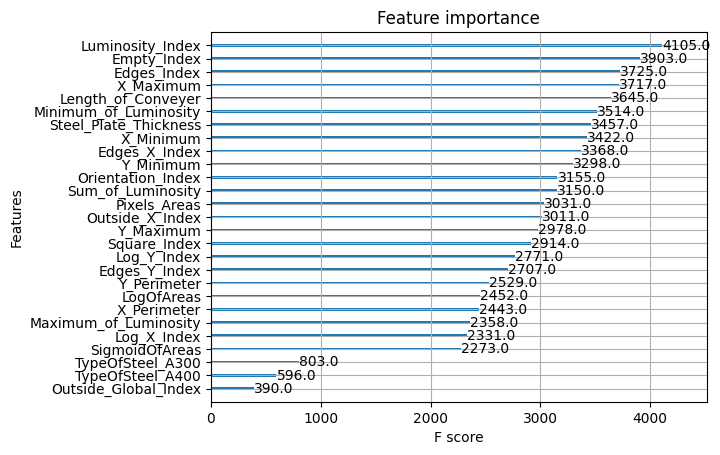

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from scipy.stats import yeojohnson, boxcox
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Load the dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Set index to 'id'
train_data = train_data.set_index('id')
test_data = test_data.set_index('id')

# Separate features and labels
X_train = train_data.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])
y_train = train_data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

# Separate numerical and categorical features (assuming only two categorical features as mentioned in the notebook)
categorical_features = ['TypeOfSteel_A300', 'TypeOfSteel_A400']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# Transformations on skewed features
for col in ['Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity']:
    X_train[col], _ = yeojohnson(X_train[col])
    test_data[col], _ = yeojohnson(test_data[col])

# Transformations on close to normal features
for col in ['Minimum_of_Luminosity', 'Orientation_Index', 'Log_Y_Index']:
    X_train[col], _ = yeojohnson(X_train[col])
    test_data[col], _ = yeojohnson(test_data[col])

# BoxCox transformation on Pixels_Areas, X_Perimeter, Y_Perimeter, and Sum_of_Luminosity
for col in ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity']:
    X_train[col], _ = boxcox(X_train[col])
    test_data[col], _ = boxcox(test_data[col])

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Splitting datasets into the Training set (80%) and Test set (20%)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Building and training the XGBoost model
xgbModel = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='auc',
    n_estimators=345,
    min_split_loss=0.11952199651205901,
    learning_rate=0.015936940536569497,
    max_depth=6,
    subsample=0.6887868631820423,
    colsample_bytree=0.36111300394581913,
    min_child_weight=3,
    reg_lambda=0.00032327115748486296,
    reg_alpha=6.340614565838557e-07
)
xgbModel.fit(X_train_split, y_train_split)

# Make predictions on the train set
y_pred_train = xgbModel.predict_proba(X_train_split)
# Make predictions on the test set
y_pred_test = xgbModel.predict_proba(X_test_split)
# Display model's performance on Train and Test set
print("XGBoost Model's performance on Train and Test set:")
print(f"AUC score on the training set: {roc_auc_score(y_train_split.values, y_pred_train)}")
print(f"AUC score on the test set: {roc_auc_score(y_test_split.values, y_pred_test)}")

# Plot feature importance
plot_importance(xgbModel, importance_type='weight')
plt.show()

# Prediction on submission set
y_pred_submission = xgbModel.predict_proba(test_data)

# Create submission file
submission_df = pd.DataFrame(y_pred_submission, columns=y_train.columns, index=test_data.index)
submission_df.to_csv("submission.csv")
